# PROJET 9
# PRODUIRE UNE ETUDE DE MARCHE AVEC PYTHON
-------

# MISSION : 
## EFFECTUER UNE PREMIÈRE ANALYSE D'UN GROUPEMENT DE PAYS CILBES POUR UNE EXPORTATION DE POULET
-------

# PLAN DE TRAVAIL

## I. IMPORTATION DES LIBRAIRIES
## II. IMPORTATION DES DONNÉES       
## III. CLASSIFICATION ASCENDANTE HIÉRARCHIQUE (CAH)
## IV. L'ANALYSE EN COMPOSANTE PRINCIPALE (ACP)
## V. L'ACP pour visualiser les données
## VI. CONCLUSION

--------

##  I. IMPORTATION DES LIBRAIRIES
--------

In [1]:
#importer les packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

#importer les packages de CAH "La classification ascendante hiérarchique"
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster. hierarchy as sch



#importer les packages de préparation de données
from sklearn.preprocessing import StandardScaler

#importer Les packages de clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn import metrics


#importer les packages kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

-------
## II. IMPORTATION DES DONNÉES
------
     - Dataset Population (2000-2018)
     - Dataset Dispinibilité alimentaire (année 2017)
     - Dataset PIB (croissance anuelle par pays année 2017)

###  Création d'une fonction pour les tests d'unicité à venir .  On peut associer  df.any() ou df.sum() pour avoir une vue synthétique.

In [2]:
def test_unique(df, col):
    is_unique = ~df[col].duplicated().any()
    if is_unique :
        print("La colonne ne posséde pas de valeurs dupliquées, elle peut donc être utilisée comme clé primaire")
    else:
        print("\033[1;31mATTENTION La colonne posséde  des valeurs dupliquées")

#### DATASET POPULATION

In [3]:
# Importer le fichier population 
population = pd.read_csv('Population_2000_2018.csv')
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


#### CALCULER LE TAUX DE CROISSANCE DEMOGRAPHIQUE SUR 5 ANS

   - Cette nouvelle variable qui reflète la dynamique démographique sur la période 2012-2017

In [4]:
# Calculer une nouvelle variable pour notre analyse : la croissance démographique en % entre 2017 et 2012
population_nv=population.pivot_table(index = 'Zone', columns = 'Année', values = 'Valeur')
population_nv['Croissance démographique (%)']=(population_nv[2017]-population_nv[2012]) /(population_nv[2012])
population_nv.head()

Année,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Croissance démographique (%)
Zone,,,,,,,,,,,,,,,,,,,,
Afghanistan,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,27722.276,28394.813,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921,0.164779
Afrique du Sud,44967.708,45571.274,46150.913,46719.196,47291.610,47880.601,48489.459,49119.759,49779.471,50477.011,51216.964,52003.755,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518,0.079063
Albanie,3129.243,3129.704,3126.187,3118.023,3104.892,3086.810,3063.021,3033.998,3002.678,2973.048,2948.023,2928.592,2914.096,2903.790,2896.305,2890.513,2886.438,2884.169,2882.740,-0.010270
Algérie,31042.235,31451.514,31855.109,32264.157,32692.163,33149.724,33641.002,34166.972,34730.608,35333.881,35977.455,36661.445,37383.895,38140.133,38923.692,39728.025,40551.392,41389.189,42228.408,0.107140
Allemagne,81400.882,81453.885,81535.122,81614.380,81646.474,81602.741,81472.226,81277.830,81065.752,80899.961,80827.002,80855.632,80972.628,81174.367,81450.378,81787.411,82193.768,82658.409,83124.418,0.020819


In [5]:
# Conserver uniquement la colonne croissance démographique pour notre analyse
population_1=population_nv.loc[:,['Croissance démographique (%)']]

population_1['Croissance démographique (%)'] = population_1['Croissance démographique (%)'] * 100
population_1.head()

Année,Croissance démographique (%)
Zone,
Afghanistan,16.477889
Afrique du Sud,7.906280
Albanie,-1.026974
Algérie,10.713956
Allemagne,2.081915


#### Ces chiffres reflètent la dynamique de la population de chaque pays sur la période 2013-2017.

In [6]:
# Récupère les dimensions du DataFrame ou tableau 'population_1'. 
population_1.shape

(238, 1)

In [7]:
# informations relatives au DataFrame
population_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, Afghanistan to Îles Wallis-et-Futuna
Data columns (total 1 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Croissance démographique (%)  236 non-null    float64
dtypes: float64(1)
memory usage: 3.7+ KB


In [8]:
# 11 valeurs nulles que nous traiterons au moment des jointures
population_1.isnull().sum()

Année
Croissance démographique (%)    2
dtype: int64

In [9]:
# Comptez le nombre total de lignes dans la colonne
total_rows = population_1.shape[0]

# Comptez le nombre de valeurs nulles dans la colonne
null_count = population_1["Croissance démographique (%)"].isnull().sum()

# Calculez le pourcentage de valeurs nulles
percentage_null = (null_count / total_rows) * 100

# Affichez le pourcentage de valeurs nulles
print(f"Le pourcentage de valeurs nulles dans la colonne 'Croissance démographique (%)' est : {percentage_null:.2f}%")


Le pourcentage de valeurs nulles dans la colonne 'Croissance démographique (%)' est : 0.84%


#### Remplacer les valeurs manquantes par la médiane de la colonne Croissance démographique (%)

In [10]:
# Calculez la médiane de la colonne "Croissance démographique (%)"
median_croissance = population_1["Croissance démographique (%)"].median()

# Remplacez les valeurs manquantes par la médiane
population_1["Croissance démographique (%)"].fillna(median_croissance, inplace=True)

# Affichez les premières lignes du DataFrame après le remplacement
print(population_1.head())

Année           Croissance démographique (%)
Zone                                        
Afghanistan                        16.477889
Afrique du Sud                      7.906280
Albanie                            -1.026974
Algérie                            10.713956
Allemagne                           2.081915


In [11]:
# vérification des valeurs nulles
population_1.isnull().sum()

Année
Croissance démographique (%)    0
dtype: int64

In [12]:
# Test d'unicité
population_2 = population_1.reset_index()
test_unique(population_2, "Zone")

La colonne ne posséde pas de valeurs dupliquées, elle peut donc être utilisée comme clé primaire


#### DATASET DISPONIBILITE ALIMENTAIRE 2017

In [13]:
# Importer le fichier disponibilité_alimentaire_2017 au format csv
disponibilité_alim_2017 = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
disponibilité_alim_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [14]:
# Afficher uniquement les colonnes dont nous avons besoin
dispo_2017=disponibilité_alim_2017.loc[:,['Zone','Élément','Produit','Valeur']]
dispo_2017.head()

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,2302.0
2,Afghanistan,Variation de stock,Blé et produits,-119.0
3,Afghanistan,Exportations - Quantité,Blé et produits,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.0


In [15]:
# aucune valeur manquante
dispo_2017.isnull().sum()

Zone       0
Élément    0
Produit    0
Valeur     0
dtype: int64

In [16]:
# Conserver uniquement les données concernant le produit 'Viande de Volailles'
dispo_viande_volaille = dispo_2017.loc[dispo_2017['Produit']==  'Viande de Volailles']
dispo_viande_volaille.head()

,Zone,Élément,Produit,Valeur
651,Afghanistan,Production,Viande de Volailles,28.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,29.0
653,Afghanistan,Variation de stock,Viande de Volailles,0.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,57.0
655,Afghanistan,Pertes,Viande de Volailles,2.0


In [17]:
# Vérifier les types de valeurs
dispo_viande_volaille.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 651 to 176400
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Zone     2061 non-null   object 
 1   Élément  2061 non-null   object 
 2   Produit  2061 non-null   object 
 3   Valeur   2061 non-null   float64
dtypes: float64(1), object(3)
memory usage: 80.5+ KB


In [18]:
dispo_2017

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,2302.00
2,Afghanistan,Variation de stock,Blé et produits,-119.00
3,Afghanistan,Exportations - Quantité,Blé et produits,0.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.00
...,...,...,...,...
176595,Zimbabwe,Nourriture,Miscellanees,19.00
176596,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Miscellanees,1.33
176597,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,1.00
176598,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Miscellanees,0.04


In [19]:
# Faire un pivot de la colonne Élément et vérifier le nombre de valeurs nulles par colonne
volaille=dispo_viande_volaille.pivot_table(index='Zone', columns='Élément', values = 'Valeur')
volaille.isnull().sum()

Élément
Alimentation pour touristes                                       94
Aliments pour animaux                                            171
Autres utilisations (non alimentaire)                            138
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité intérieure                                           2
Exportations - Quantité                                           37
Importations - Quantité                                            2
Nourriture                                                         2
Pertes                                                           105
Production                                                         4
Résidus                                                            8
Semences                  

In [20]:
# Les variables que nous utiliserons pour nos analyses sont les disponibilités, l'exportation, l'importation, et la production
# Remplacer les valeurs nulles des colonnes par leurs moyennes
volaille=dispo_viande_volaille.pivot_table(index='Zone', columns='Élément', values = 'Valeur').fillna(volaille.mean())
volaille.head()

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,0.217949,0.0,44.117647,5.0,1.53,0.33,0.54,57.0,132.185185,29.0,55.0,2.00000,28.0,0.0,0.0,26.282609,0.0
Afrique du Sud,0.000000,0.0,44.117647,143.0,35.69,9.25,14.11,2118.0,63.000000,514.0,2035.0,83.00000,1667.0,0.0,0.0,26.282609,0.0
Albanie,0.217949,0.0,44.117647,85.0,16.36,6.45,6.26,47.0,0.000000,38.0,47.0,43.58209,13.0,0.0,0.0,26.282609,4.0
Algérie,0.000000,0.0,44.117647,22.0,6.38,1.50,1.97,277.0,0.000000,2.0,264.0,13.00000,275.0,0.0,0.0,26.282609,0.0
Allemagne,0.217949,0.0,44.117647,71.0,19.47,4.16,7.96,1739.0,646.000000,842.0,1609.0,43.58209,1514.0,-38.0,0.0,167.000000,-29.0


In [21]:
# Test d'unicité
volaille_2 = volaille.reset_index()
test_unique(volaille_2, "Zone")

La colonne ne posséde pas de valeurs dupliquées, elle peut donc être utilisée comme clé primaire


### Création de nouvelles variables pour notre analyse
### Définitions

#### Par acquisition 

   - DISPONIBILITE INTERIEUR = Production + importations - exportations + variations des stocks (baisse ou augmentation
   - Taux de dépendance aux importations (TDI) = (Importation ÷ Disponibilité intérieure) x 100 
   - Taux d'auto-suffisance (TAS) = (Production ÷ Disponibilité intérieure) x 100
  
### Plus le TDI est élevé plus la dépendance du pays à l'importation est forte
### Plus le TAS est élevé plus le pays est auto-suffisant cad la production est forte également

In [22]:
# calculer dans 2 nouvelles variables le TDI et le TAS
volaille['TDI (%)']=(volaille['Importations - Quantité']/volaille['Disponibilité intérieure'])*100
volaille['TAS (%)']=(volaille['Production']/volaille['Disponibilité intérieure'])*100
volaille.head()

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,TDI (%),TAS (%)
Zone,,,,,,,,,,,,,,,,,,,
Afghanistan,0.217949,0.0,44.117647,5.0,1.53,0.33,0.54,57.0,132.185185,29.0,55.0,2.00000,28.0,0.0,0.0,26.282609,0.0,50.877193,49.122807
Afrique du Sud,0.000000,0.0,44.117647,143.0,35.69,9.25,14.11,2118.0,63.000000,514.0,2035.0,83.00000,1667.0,0.0,0.0,26.282609,0.0,24.268178,78.706327
Albanie,0.217949,0.0,44.117647,85.0,16.36,6.45,6.26,47.0,0.000000,38.0,47.0,43.58209,13.0,0.0,0.0,26.282609,4.0,80.851064,27.659574
Algérie,0.000000,0.0,44.117647,22.0,6.38,1.50,1.97,277.0,0.000000,2.0,264.0,13.00000,275.0,0.0,0.0,26.282609,0.0,0.722022,99.277978
Allemagne,0.217949,0.0,44.117647,71.0,19.47,4.16,7.96,1739.0,646.000000,842.0,1609.0,43.58209,1514.0,-38.0,0.0,167.000000,-29.0,48.418631,87.061530


In [23]:
# dataset avec les colonnes à utiliser pour les jointures et en suite notre analyse
volaille = volaille.loc[:,['Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','TAS (%)','TDI (%)']]
volaille.rename(columns ={"Disponibilité alimentaire (Kcal/personne/jour)": "Disp_alim_Kcal/per/jour","Disponibilité de protéines en quantité (g/personne/jour)": "Disp_prot_g/per/jour","Disponibilité alimentaire en quantité (kg/personne/an)":"Disp_quanti_kg/per/an" }, inplace= True)
volaille.head()

Élément,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%)
Zone,,,,,
Afghanistan,1.53,5.0,0.54,49.122807,50.877193
Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178
Albanie,16.36,85.0,6.26,27.659574,80.851064
Algérie,6.38,22.0,1.97,99.277978,0.722022
Allemagne,19.47,71.0,7.96,87.061530,48.418631


#### DATASET PIB 2017

In [24]:
# Importer le fichier pib_2017.csv et on garde les colonnes nécessaire pour la réalisation de notre étude
pib = pd.read_csv('Pib_2017.csv')
variables = ['Zone', 'Valeur']
pib = pib[variables]
pib.head()

,Zone,Valeur
0,Afghanistan,4.865790
1,Afrique du Sud,17.703800
2,Albanie,9.765944
3,Algérie,6.287893
4,Allemagne,6.441277


In [25]:
# Renommer la colonne "valeur"
pib.rename(columns={ 'Valeur': 'croissance_pib' })

,Zone,croissance_pib
0,Afghanistan,4.865790
1,Afrique du Sud,17.703800
2,Albanie,9.765944
3,Algérie,6.287893
4,Allemagne,6.441277
...,...,...
206,Venezuela (République bolivarienne du),-14.069328
207,Viet Nam,9.014049
208,Yémen,-1.798504
209,Zambie,20.582767


In [26]:
# lignes et colonnes
pib.shape

(211, 2)

In [27]:
# 8 valeurs nulles que nous traiterons également au moment des jointures
pib.isnull().sum()

Zone      0
Valeur    0
dtype: int64

In [28]:
# Test d'unicité
test_unique(pib, "Zone")

La colonne ne posséde pas de valeurs dupliquées, elle peut donc être utilisée comme clé primaire


#### PREMIERE JOINTURE 

In [29]:
# Effectuer la première jointure entre le dataset résultant de population avec celui des disponibilités alimentaires
volaille_pop = volaille.merge(population_1,on='Zone',how='inner')
volaille_pop.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%)
Zone,,,,,,
Afghanistan,1.53,5.0,0.54,49.122807,50.877193,16.477889
Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178,7.906280
Albanie,16.36,85.0,6.26,27.659574,80.851064,-1.026974
Algérie,6.38,22.0,1.97,99.277978,0.722022,10.713956
Allemagne,19.47,71.0,7.96,87.061530,48.418631,2.081915


In [30]:
# Nombre de lignes et colonnes
volaille_pop.shape

(172, 6)

#### DEUXIEME JOINTURE

In [31]:
# Effectuer la deuxième jointure avec le dataset pib 2017  
vol_pop_pib = volaille_pop.merge(pib,on='Zone',how='inner')
vol_pop_pib.head()

,Zone,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Valeur
0,Afghanistan,1.53,5.0,0.54,49.122807,50.877193,16.477889,4.865790
1,Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178,7.906280,17.703800
2,Albanie,16.36,85.0,6.26,27.659574,80.851064,-1.026974,9.765944
3,Algérie,6.38,22.0,1.97,99.277978,0.722022,10.713956,6.287893
4,Allemagne,19.47,71.0,7.96,87.061530,48.418631,2.081915,6.441277


In [32]:
# Renommer une colonne
vol_pop_pib.rename(columns = {'Valeur':'Croissance_Pib_(%)'}, inplace = True)

In [33]:
vol_pop_pib

,Zone,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Croissance_Pib_(%)
0,Afghanistan,1.53,5.0,0.54,49.122807,50.877193,16.477889,4.865790
1,Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178,7.906280,17.703800
2,Albanie,16.36,85.0,6.26,27.659574,80.851064,-1.026974,9.765944
3,Algérie,6.38,22.0,1.97,99.277978,0.722022,10.713956,6.287893
4,Allemagne,19.47,71.0,7.96,87.061530,48.418631,2.081915,6.441277
...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,43.47,147.0,14.80,11.650485,105.097087,3.780598,7.999087
166,Équateur,19.31,83.0,6.15,99.706745,0.000000,8.473901,4.360883
167,États-Unis d'Amérique,55.68,219.0,19.93,119.971532,0.673382,3.515710,4.184149
168,Éthiopie,0.13,0.0,0.04,100.000000,7.142857,14.745372,6.426252


In [34]:
# Aucune valeur nulle
vol_pop_pib.isnull().sum()

Zone                            0
Disp_quanti_kg/per/an           0
Disp_alim_Kcal/per/jour         0
Disp_prot_g/per/jour            0
TAS (%)                         0
TDI (%)                         0
Croissance démographique (%)    0
Croissance_Pib_(%)              0
dtype: int64

#### VERIFICATION DE LA DISTRIBUTION DES VARIABLES DE TOUS LES INDIVIDUS

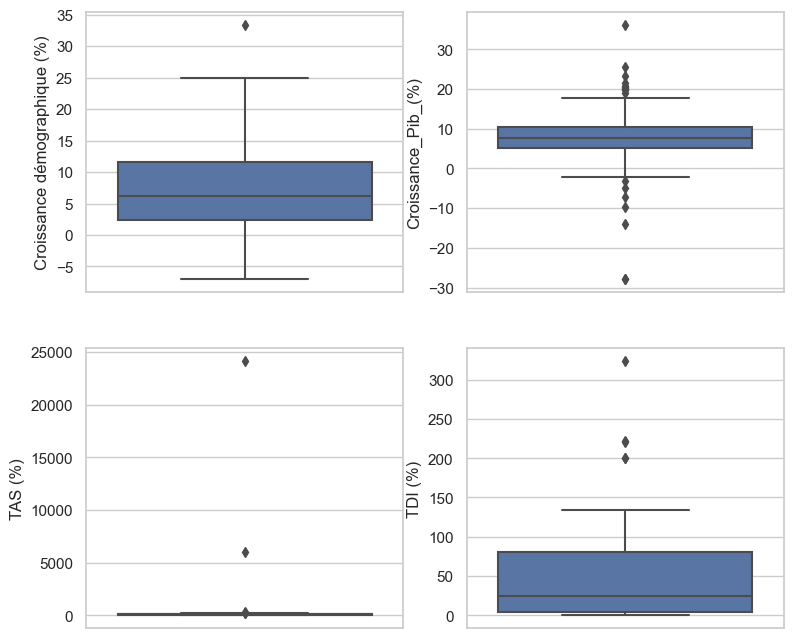

In [35]:
# Afficher des boxplot
plt.figure(figsize=(9, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=vol_pop_pib,y='Croissance démographique (%)')
plt.subplot(222)
sns.boxplot(data=vol_pop_pib, y='Croissance_Pib_(%)')
plt.subplot(223)
sns.boxplot(data=vol_pop_pib, y='TAS (%)')
plt.subplot(224)
sns.boxplot(data=vol_pop_pib,y='TDI (%)')
plt.savefig('Distribution de l\'ensemble variables.jpg')

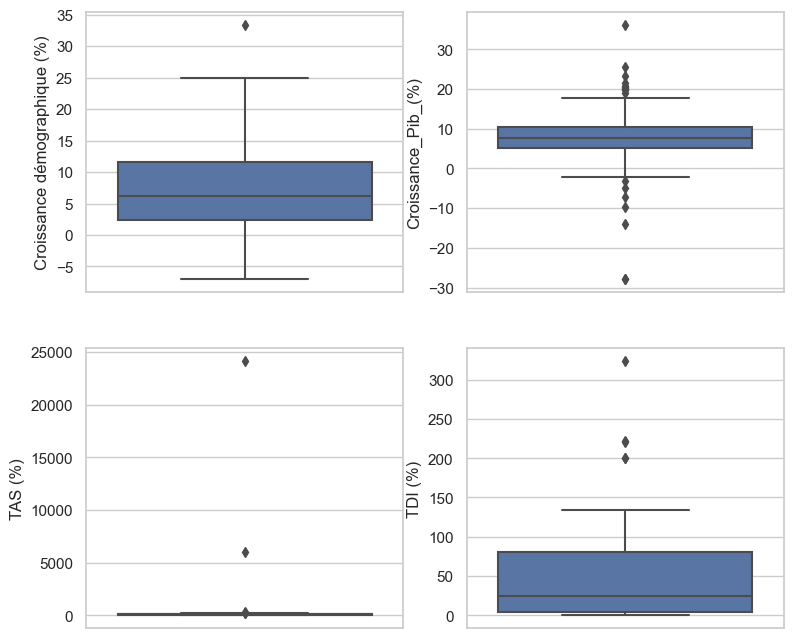

In [36]:
# Créer une figure pour les boxplots
plt.figure(figsize=(9, 8))
sns.set(style="whitegrid")

# Boxplot 1
plt.subplot(221)
sns.boxplot(data=vol_pop_pib, y='Croissance démographique (%)')

# Boxplot 2
plt.subplot(222)
sns.boxplot(data=vol_pop_pib, y='Croissance_Pib_(%)')

# Boxplot 3
plt.subplot(223)
sns.boxplot(data=vol_pop_pib, y='TAS (%)')

# Boxplot 4
plt.subplot(224)
sns.boxplot(data=vol_pop_pib, y='TDI (%)')

# Enregistrer la figure en tant qu'image
plt.savefig('Distribution de l\'ensemble des variables.jpg')


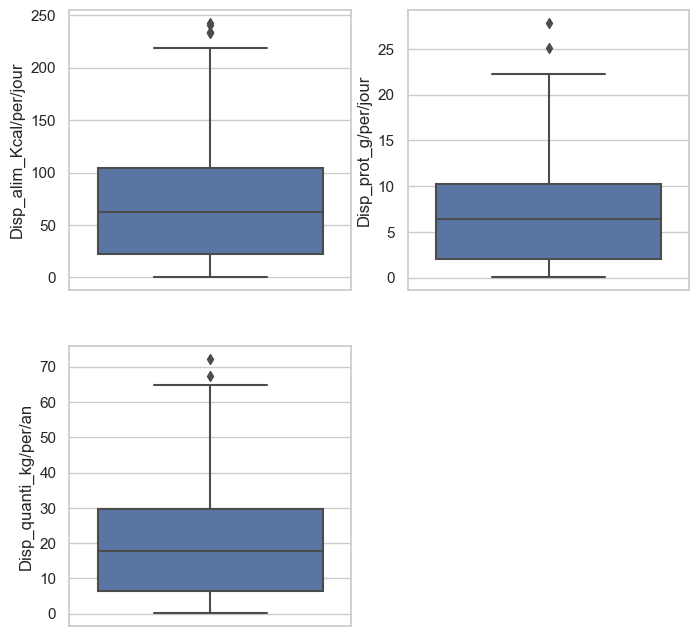

In [37]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=vol_pop_pib,  y='Disp_alim_Kcal/per/jour')
plt.subplot(222)
sns.boxplot(data=vol_pop_pib,  y='Disp_prot_g/per/jour')
plt.subplot(223)
sns.boxplot(data=vol_pop_pib,  y='Disp_quanti_kg/per/an')
plt.savefig('Distribution de l\'ensemble variables_suite.jpg')

##### Voici les boxplots pour les différentes variables . Ces graphiques permettent de visualiser la distribution, la médiane, ainsi que les valeurs aberrantes pour chaque variable.

In [38]:
# Afficher les valeurs extremes de l'auto-suffisance
vol_pop_pib.sort_values(by = ['TAS (%)'], ascending = False).head()

,Zone,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Croissance_Pib_(%)
42,Djibouti,2.68,9.0,0.92,24173.015873,100.000000,8.750001,5.662606
91,Maldives,13.50,47.0,4.70,6043.253968,100.000000,24.963687,8.564508
16,Belgique,12.65,44.0,4.57,304.605263,222.368421,3.016502,5.680656
117,Pologne,30.30,107.0,12.14,203.373702,4.757785,-0.716414,11.619956
149,Thaïlande,12.95,47.0,4.35,190.238365,0.227015,2.025250,10.400089


In [39]:
# Vérifier les types de valeurs
vol_pop_pib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          170 non-null    object 
 1   Disp_quanti_kg/per/an         170 non-null    float64
 2   Disp_alim_Kcal/per/jour       170 non-null    float64
 3   Disp_prot_g/per/jour          170 non-null    float64
 4   TAS (%)                       170 non-null    float64
 5   TDI (%)                       170 non-null    float64
 6   Croissance démographique (%)  170 non-null    float64
 7   Croissance_Pib_(%)            170 non-null    float64
dtypes: float64(7), object(1)
memory usage: 12.0+ KB


In [40]:
# Passer la colonne Zone en index
vol_pop_pib = vol_pop_pib.set_index('Zone')

In [41]:
# Exclure les 2 pays qui représentent des valeurs extrèmes
vol_pop_pib = vol_pop_pib.drop(['Djibouti', 'Maldives']) # en suprimant djibouti et Maldives qui sont des valeurs extrêmes

In [42]:
vol_pop_pib.sort_values(by = ['TAS (%)'], ascending = False).head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Croissance_Pib_(%)
Zone,,,,,,,
Belgique,12.65,44.0,4.57,304.605263,222.368421,3.016502,5.680656
Pologne,30.30,107.0,12.14,203.373702,4.757785,-0.716414,11.619956
Thaïlande,12.95,47.0,4.35,190.238365,0.227015,2.025250,10.400089
Hongrie,25.27,104.0,9.80,185.338346,21.804511,-1.363850,11.276256
Bélarus,27.98,95.0,9.41,174.716981,7.924528,0.352393,14.671728


In [43]:
vol_pop_pib.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Croissance_Pib_(%)
Zone,,,,,,,
Afghanistan,1.53,5.0,0.54,49.122807,50.877193,16.477889,4.865790
Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178,7.906280,17.703800
Albanie,16.36,85.0,6.26,27.659574,80.851064,-1.026974,9.765944
Algérie,6.38,22.0,1.97,99.277978,0.722022,10.713956,6.287893
Allemagne,19.47,71.0,7.96,87.061530,48.418631,2.081915,6.441277


In [44]:
# Enregistrement de la partie traitement des données
vol_pop_pib.to_csv('etude_marche_traitement.csv')